In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle
import os
import numpy as np
import scipy.constants as sc

# Define Helper Functions

In [5]:
def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))
 
# Constants
a1=0.003323467
a2=0.97183224
a3=9.26148e-05
a4=3.1016524
b0=-1.762999
b1=1.4317567
b2=0.31546338
c1=-0.36666667
c2=0.98333333
alpha=14.3139316
beta=0.66240046
fthrds=1.3333333333333333 

# TF zbar
# More Table IV fit
def get_TF_zbar(Te,ni,Z): 

    # form tzero,r,tf
    tzero = Te/(Z**fthrds)
    r     = ni/Z/sc.N_A
    tf    = tzero/(1.0+tzero)

    # calculate a,b and c
    aa = (a1*(tzero**a2))+(a3*(tzero**a4))
    b  = -np.exp(b0+(b1*tf)+(b2*(tf**7)))
    c  = c2+(c1*tf)
    # calculate q1 and thereby q
    q1 = aa*(r**b)
    q  = (r**c)+(q1**c)
    cm = 1.0/c
    q  = q**cm
    # calculate x
    x = alpha*(q**beta)
    # calculate zbar
    fraction = x/(1.0+x+(np.sqrt(1.0+(2.0*x))))
    return fraction*Z

def open_opa_emi_files_2(ofile,efile):
	with open(ofile,'rb') as f:
		line = f.readline()
		# print(line)
		junk = np.fromfile(f,dtype='c',count=9)
		ints = np.fromfile(f,dtype='int16',count=1)
		junk = np.fromfile(f,dtype='c',count=2)
		nTe = np.fromfile(f,dtype='int16',count=1)
		# print("Number of Te points: %i"%nTe)
		junk = np.fromfile(f,dtype='c',count=2)
		nrho = np.fromfile(f,dtype='int16',count=1)
		# print("Number of rho points: %i"%nrho)
		junk = np.fromfile(f,dtype='c',count=2)
		ngrp = np.fromfile(f,dtype='int16',count=1)
		# print("Number of energy groups: %i"%ngrp)
		junk = np.fromfile(f,dtype='c',count=2)
		Te = np.fromfile(f,dtype='float32',count=int(nTe))
		# print(Te)
		#junk = np.fromfile(f,dtype='c',count=2)
		rho = np.fromfile(f,dtype='float32',count=int(nrho))
		# print(rho)
		grps = np.fromfile(f,dtype='float32',count=int(ngrp+1))
		# print(grps)
		opa_data = np.fromfile(f,dtype='float32',count=-1)
		opa_data = opa_data.reshape(int(ngrp),int(nrho),int(nTe))
		# print(opa_data.shape)
	with open(efile,'rb') as f:
		line = f.readline()
		# print(line)
		junk = np.fromfile(f,dtype='c',count=9)
		ints = np.fromfile(f,dtype='int16',count=1)
		junk = np.fromfile(f,dtype='c',count=2)
		nTe = np.fromfile(f,dtype='int16',count=1)
		# print("Number of Te points: %i"%nTe)
		junk = np.fromfile(f,dtype='c',count=2)
		nrho = np.fromfile(f,dtype='int16',count=1)
		# print("Number of rho points: %i"%nrho)
		junk = np.fromfile(f,dtype='c',count=2)
		ngrp = np.fromfile(f,dtype='int16',count=1)
		# print("Number of energy groups: %i"%ngrp)
		junk = np.fromfile(f,dtype='c',count=2)
		Te = np.fromfile(f,dtype='float32',count=int(nTe))
		# print(Te)
		#junk = np.fromfile(f,dtype='c',count=2)
		rho = np.fromfile(f,dtype='float32',count=int(nrho))
		# print(rho)
		grps = np.fromfile(f,dtype='float32',count=int(ngrp+1))
		# print(grps)
		emi_data = np.fromfile(f,dtype='float32',count=-1)
		emi_data = emi_data.reshape(int(ngrp),int(nrho),int(nTe))
		# print(emi_data.shape)
	grp_centres = 0.5*(grps[:-1]+grps[1:])
	return grp_centres,grps,rho,Te,opa_data,emi_data

def open_opa_emi_files(ofile,efile):
    with open(ofile,'rb') as f:
        line = f.readline()
        # print(line)
        junk = np.fromfile(f,dtype='c',count=9)
        ints = np.fromfile(f,dtype='int16',count=1)
        junk = np.fromfile(f,dtype='c',count=2)
        nTe = np.fromfile(f,dtype='int16',count=1)
        # print("Number of Te points: %i"%nTe)
        junk = np.fromfile(f,dtype='c',count=2)
        nrho = np.fromfile(f,dtype='int16',count=1)
        # print("Number of rho points: %i"%nrho)
        junk = np.fromfile(f,dtype='c',count=2)
        ngrp = np.fromfile(f,dtype='int16',count=1)
        # print("Number of energy groups: %i"%ngrp)
        junk = np.fromfile(f,dtype='c',count=2)
        Te = np.fromfile(f,dtype='float32',count=int(nTe))
        # print(Te)
        #junk = np.fromfile(f,dtype='c',count=2)
        rho = np.fromfile(f,dtype='float32',count=int(nrho))
        # print(rho)
        grps = np.fromfile(f,dtype='float32',count=int(ngrp+1))
        # print(grps)
        opa_data = np.fromfile(f,dtype='float32',count=-1)
        opa_data = opa_data.reshape(int(ngrp),int(nrho),int(nTe))
        # print(opa_data.shape)
    with open(efile,'rb') as f:
        line = f.readline()
        # print(line)
        junk = np.fromfile(f,dtype='c',count=9)
        ints = np.fromfile(f,dtype='int16',count=1)
        junk = np.fromfile(f,dtype='c',count=2)
        nTe = np.fromfile(f,dtype='int16',count=1)
        # print("Number of Te points: %i"%nTe)
        junk = np.fromfile(f,dtype='c',count=2)
        nrho = np.fromfile(f,dtype='int16',count=1)
        # print("Number of rho points: %i"%nrho)
        junk = np.fromfile(f,dtype='c',count=2)
        ngrp = np.fromfile(f,dtype='int16',count=1)
        # print("Number of energy groups: %i"%ngrp)
        junk = np.fromfile(f,dtype='c',count=2)
        Te = np.fromfile(f,dtype='float32',count=int(nTe))
        # print(Te)
        #junk = np.fromfile(f,dtype='c',count=2)
        rho = np.fromfile(f,dtype='float32',count=int(nrho))
        # print(rho)
        grps = np.fromfile(f,dtype='float32',count=int(ngrp+1))
        # print(grps)
        emi_data = np.fromfile(f,dtype='float32',count=-1)
        emi_data = emi_data.reshape(int(ngrp),int(nrho),int(nTe))
        # print(emi_data.shape)
    grp_centres = 0.5*(grps[:-1]+grps[1:])
    grp_widths = grps[1:]-grps[:-1]
    return grps, grp_widths, grp_centres,rho,Te,opa_data,emi_data

E_z_al = np.array([-2304.16,-2086.04,-442.08,-399.37,-330.11,-284.6,-241.44,-190.48,-153.826,-119.99,-28.448,-18.829,-5.986,0.])


In [6]:
# Specify Spk emissivity and opacity data filenames


fname_emi = './atomic_rad_data/emi_multi_Aluminium_LTE_210506_Al_LowRes.spk'
fname_opa = './atomic_rad_data/opa_multi_planck_Aluminium_LTE_210506_Al_LowRes.spk'
# fname_opa = './atomic_rad_data/opa_multi_ross_Aluminium_LTE_210506_Al_LowRes.spk'

grps, grp_widths, grp_centres,rho_op,T_e_op,opa_data,emi_data = open_opa_emi_files(fname_opa, fname_emi) # Read Spk tables
# grp_centres,grps,rho_op,T_e_op,opa_data,emi_data = open_opa_emi_files_2(fname_opa, fname_emi)

In [7]:
# Show Sizes of Skp Tables

print('emi = ', emi_data.shape)
print('opa = ', opa_data.shape)
print('rho_op = ', rho_op.shape)
print('T_e_op = ', T_e_op.shape)
print('grp_centres = ', grp_centres.shape)


emi =  (32, 132, 107)
opa =  (32, 132, 107)
rho_op =  (132,)
T_e_op =  (107,)
grp_centres =  (32,)


In [8]:
# Show Group Centers in [eV]

grp_centres

array([1.64222717e+00, 3.75159264e+00, 8.57034111e+00, 1.95785542e+01,
       4.47263107e+01, 8.12827377e+01, 1.19413284e+02, 1.57543823e+02,
       1.95674377e+02, 2.33804916e+02, 2.71935455e+02, 3.10066010e+02,
       3.48196564e+02, 3.86327087e+02, 4.24457642e+02, 6.17725159e+02,
       1.10297241e+03, 1.45854321e+03, 1.54759497e+03, 1.63664685e+03,
       1.72569861e+03, 1.81475049e+03, 1.90380225e+03, 1.99285400e+03,
       2.08190576e+03, 2.17095752e+03, 2.26000928e+03, 3.28448145e+03,
       6.07776758e+03, 1.12466045e+04, 2.08112793e+04, 3.85102266e+04],
      dtype=float32)

# Filtered Emissivity

n_i [cm^-3]= 1.4078536971452672e+18
62 1.58495
65 2.51198
68 3.98123
71 6.30982
74 10.00039
77 19.9534
80 39.81226
83 79.4359
86 158.49535


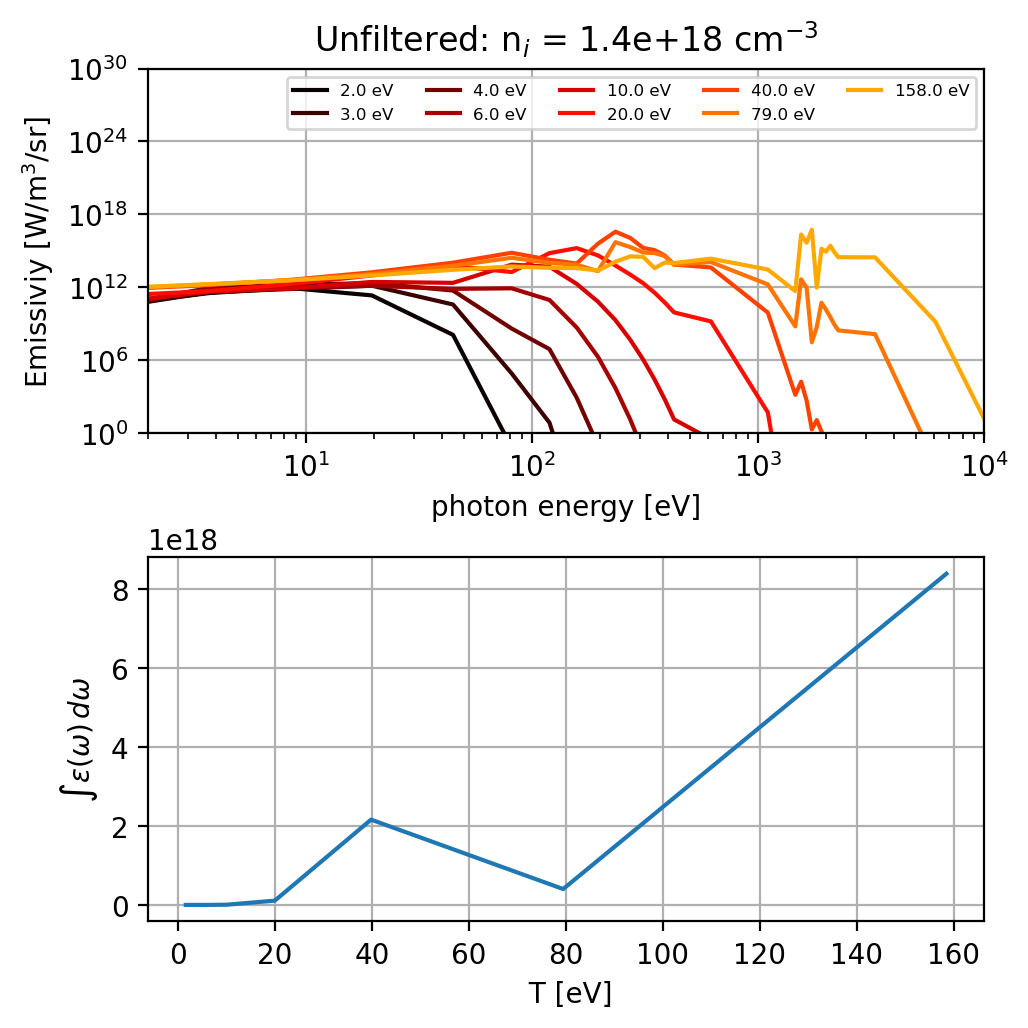

In [9]:
import matplotlib.cm as cm

clr = cm.hot(np.linspace(0,1,40)); cnt = 0

i = 8
print('n_i [cm^-3]=',rho_op[i]/(27*1.66e-27*1e6))
signal = []
fig, axs = plt.subplots(2,1,figsize=(5,5),dpi=200)
A = range(62,89,3)
for j in A:
    print(j,T_e_op[j])
    axs[0].plot(grp_centres,emi_data[:,i,j],label=str(np.round(T_e_op[j])) + ' eV',color=clr[cnt*3])
    idx = np.argwhere(grp_centres < 1e4)
    signal.append(np.trapz(np.squeeze(emi_data[idx,i,j]), np.squeeze(grp_centres[idx])))
    cnt+=1
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlabel('photon energy [eV]')
axs[0].set_ylabel('Emissiviy [W/m$^3$/sr]')
axs[0].set_xlim([2,1e4])
axs[0].set_title('Unfiltered: n$_i$ = %1.2g cm$^{-3}$'%(rho_op[i]/(27*1.66e-27*1e6)))
axs[0].set_ylim([1,1e30])
axs[0].legend(ncol=5,fontsize=6)
axs[0].grid()

# Total signal
axs[1].plot(T_e_op[A],signal)
axs[1].grid()

axs[1].set_xlabel(' T [eV]');
axs[1].set_ylabel('$\int \epsilon(\omega) \, d\omega$')
plt.tight_layout(pad=0.2)


emi_unfiltered = signal

n_i [cm^-3]= 5.604417820904522e+18
62 1.58495
65 2.51198
68 3.98123
71 6.30982
74 10.00039
77 19.9534
80 39.81226
83 79.4359
86 158.49535


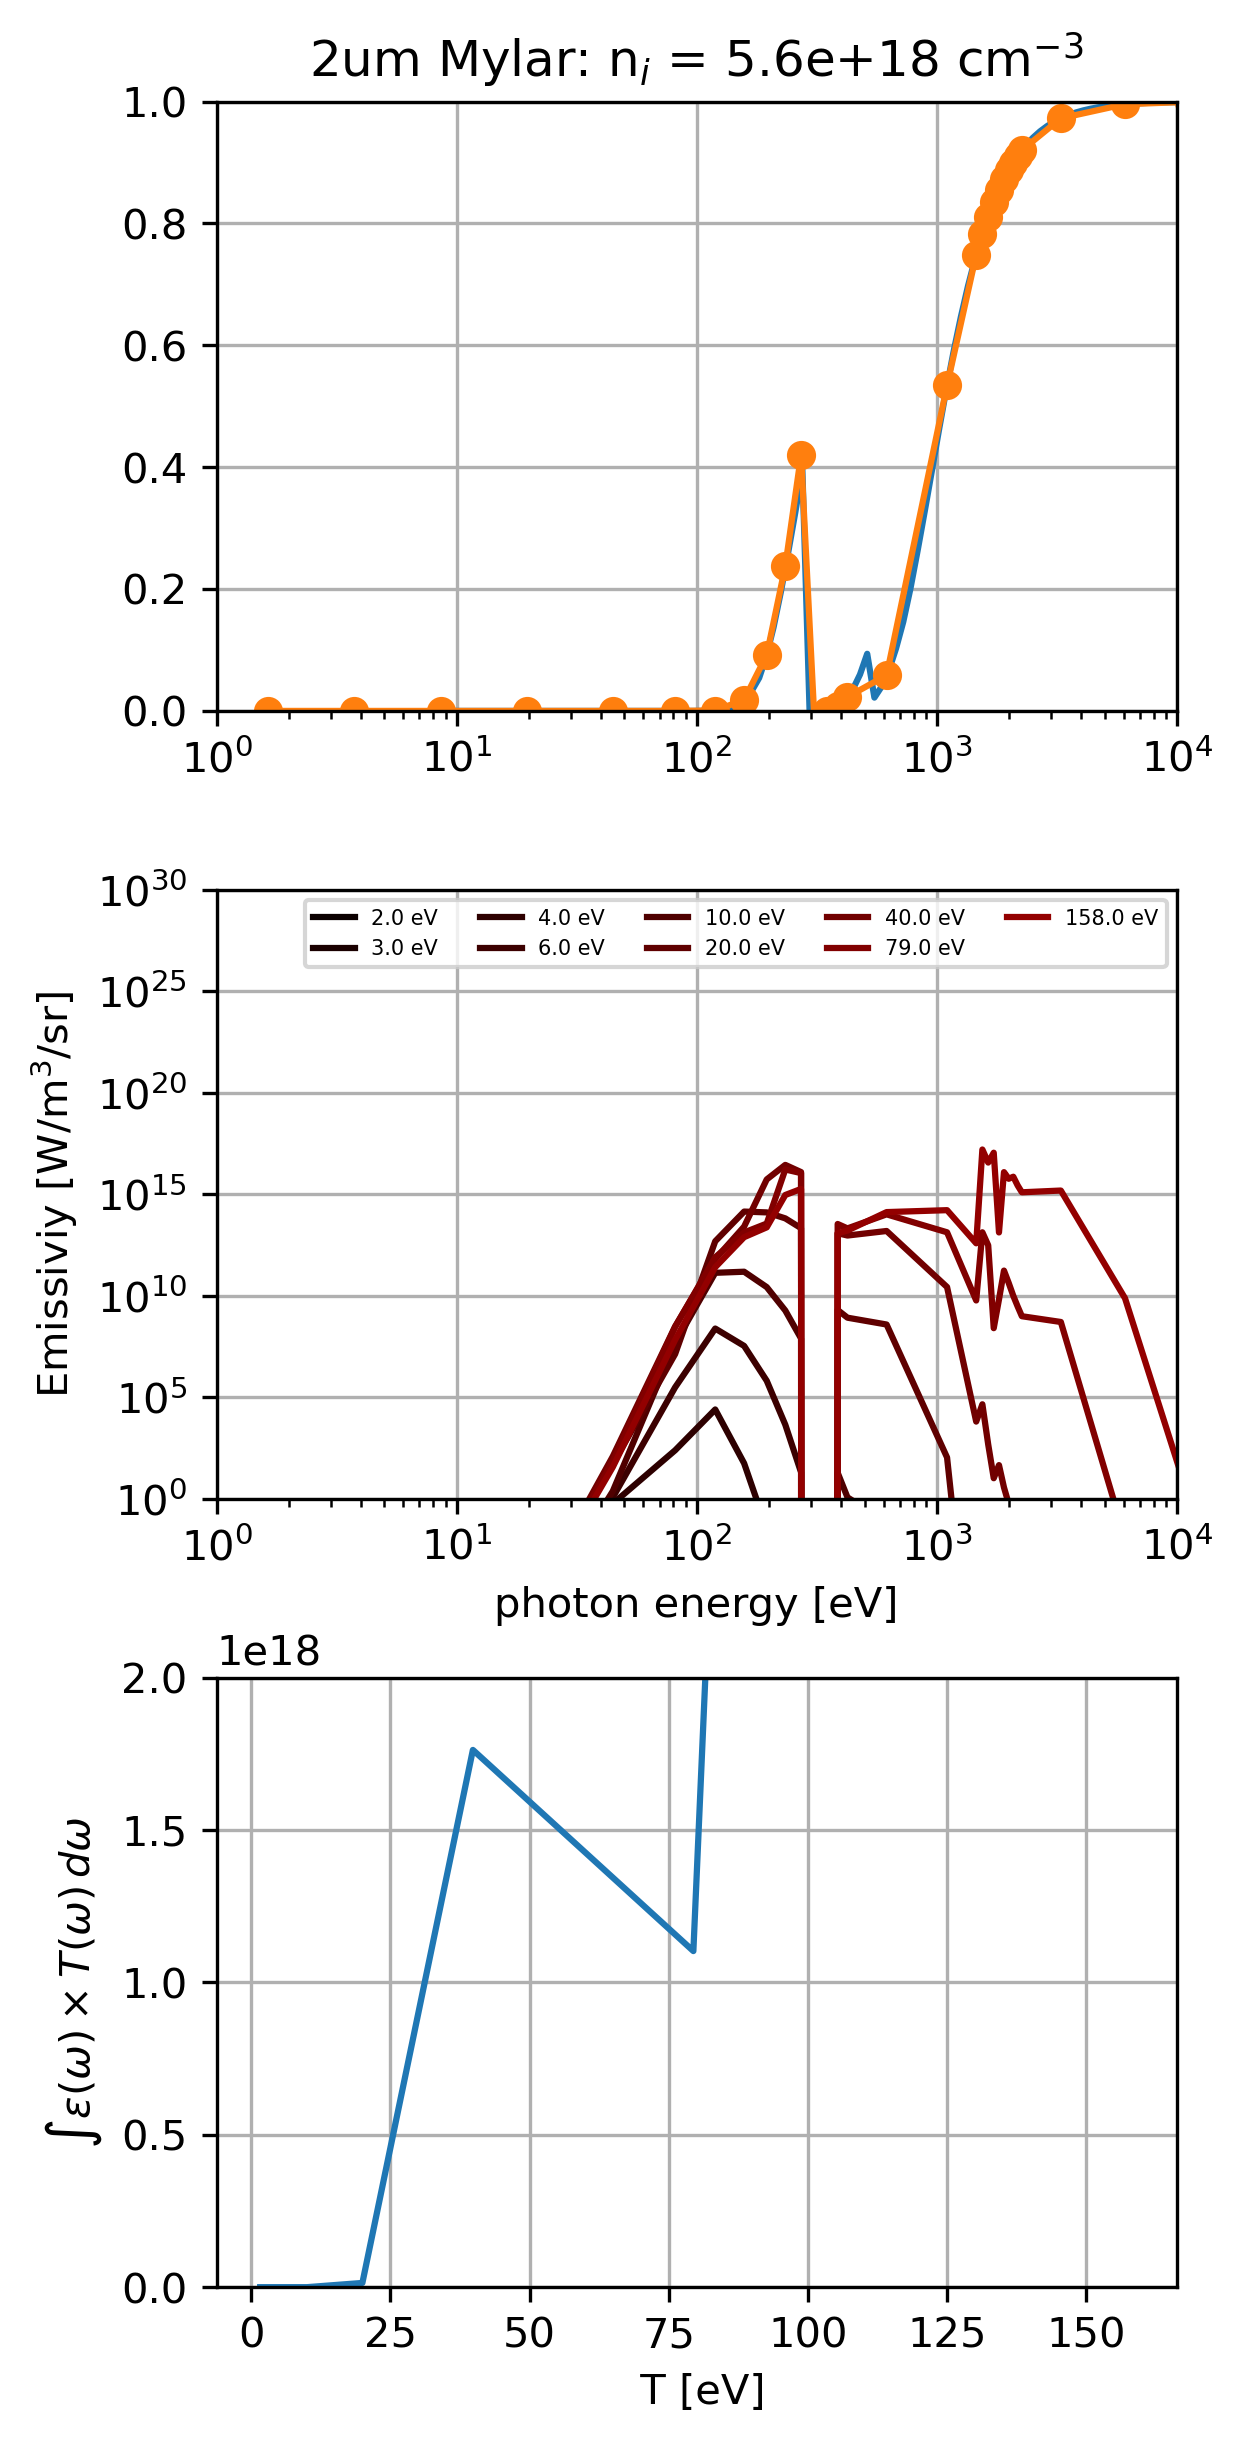

In [10]:
# filter_dir = '\\Users\\rdatta\\Dropbox (MIT)\\PUFFIN\\Codes\\MARZ\\filter_tables\\'
filter_dir = '/Users/rishabhdatta/Dropbox (MIT)/PUFFIN/Codes/MARZ/filter_tables/' # Directory where filters are stored
filter_name = 'mylar_2um - Copy.dat' # Filter name
data = np.loadtxt(filter_dir +filter_name)
from scipy import interpolate
obj = interpolate.interp1d(np.log(data[:,0]), data[:,1], kind='cubic',fill_value="extrapolate")
T = obj(np.log(grp_centres))

fig,axs = plt.subplots(3,1,figsize=(4,8),dpi=300,sharex=False)
axs[0].plot(data[:,0],data[:,1])
axs[0].plot(grp_centres,T,marker='o')
axs[0].set_xscale('log')
axs[0].set_xlim([1,1e4])
axs[0].set_ylim([0,1])
axs[0].grid()

import matplotlib.cm as cm

clr = cm.hot(np.linspace(0,1,40)); cnt = 0

i = 11 # Tbal eIndex for which to plot data
print('n_i [cm^-3]=',rho_op[i]/(27*1.66e-27*1e6))

signal = []

for j in A:
    print(j,T_e_op[j])
    axs[1].plot(grp_centres,np.squeeze(emi_data[:,i,j]) * np.squeeze(T),label=str(np.round(T_e_op[j])) + ' eV',color=clr[cnt])
    idx = np.argwhere(grp_centres < 1e4)
    signal.append(np.trapz(np.squeeze(emi_data[idx,i,j]) * np.squeeze(T[idx]), np.squeeze(grp_centres[idx])))
    cnt+=1
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel('photon energy [eV]')
axs[1].set_ylabel('Emissiviy [W/m$^3$/sr]')
axs[1].set_xlim([1,1e4])
axs[1].set_ylim([1,1e30])
axs[0].set_title('2um Mylar: n$_i$ = %1.2g cm$^{-3}$'%(rho_op[i]/(27*1.66e-27*1e6)))
axs[1].set_ylim(ymin=1)
axs[1].legend(ncol=5,fontsize=5)
axs[1].grid()

# Total signal
axs[2].plot(T_e_op[A],signal)
axs[2].grid()
axs[2].set_ylim([0,2e18])
axs[2].set_xlabel(' T [eV]');
axs[2].set_ylabel('$\int \epsilon(\omega)\\times T(\omega) \, d\omega$')
plt.tight_layout(pad=0.2)

emi_mylar = signal


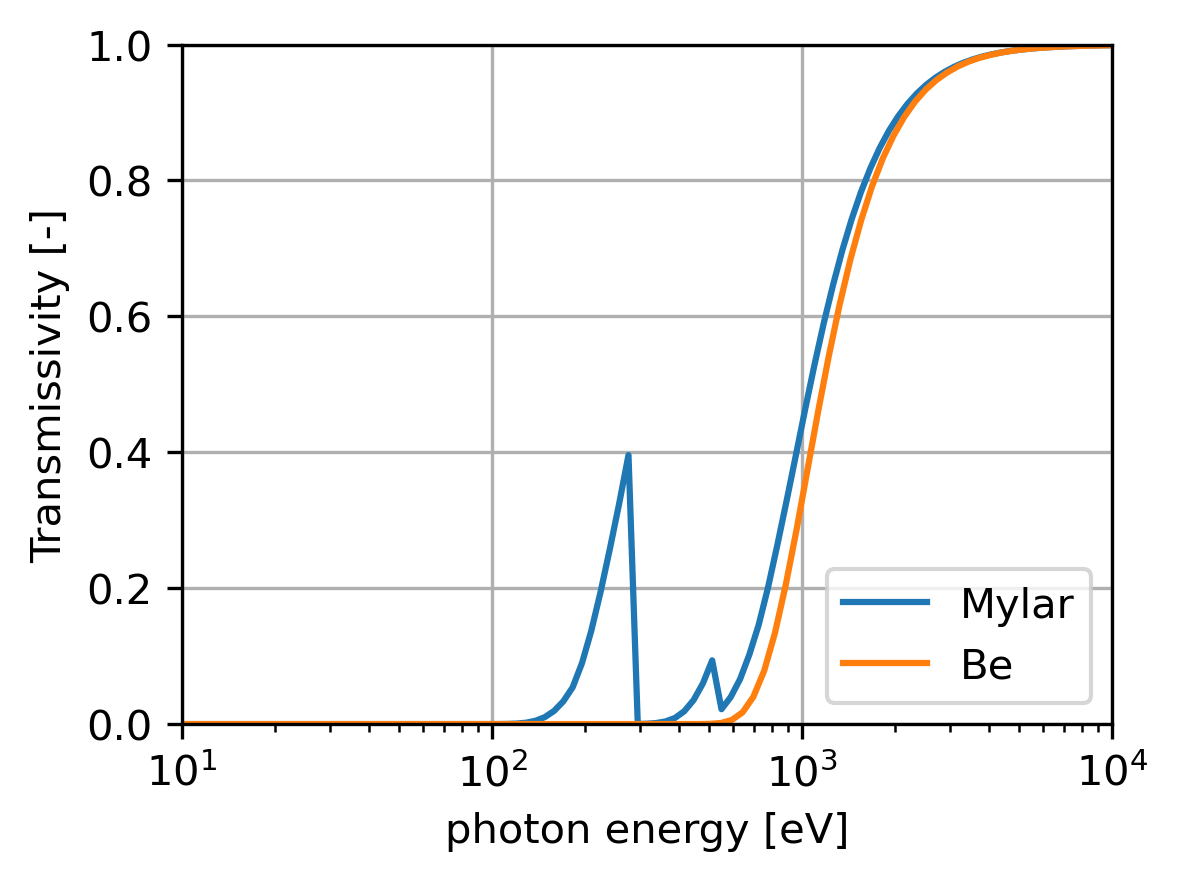

In [11]:
# Show Filter Transmission

# filter_dir = '\\Users\\rdatta\\Dropbox (MIT)\\PUFFIN\\Codes\\MARZ\\filter_tables\\'
filter_dir = '/Users/rishabhdatta/Dropbox (MIT)/PUFFIN/Codes/MARZ/filter_tables/'
filter_name = 'mylar_2um - Copy.dat'
data = np.loadtxt(filter_dir +filter_name)


fig,axs = plt.subplots(1,1,figsize=(4,3),dpi=300,sharex=False)
axs.plot(data[:,0],data[:,1],label='Mylar')

axs.set_xscale('log')
axs.set_xlim([10,1e4])
axs.set_ylim([0,1])
axs.set_xlabel('photon energy [eV]')
axs.set_ylabel('Transmissivity [-]')
axs.grid()


filter_name = 'Be_10um - Copy.dat'
data = np.loadtxt(filter_dir +filter_name)

axs.plot(data[:,0],data[:,1],label='Be')

axs.legend(loc='lower right')




n_i [cm^-3]= 5.604417820904522e+18
60 1.16596
61 1.35941
62 1.58495
63 1.84792
64 2.15452
65 2.51198
66 2.92876
67 3.41468
68 3.98123
69 4.64177
70 5.41191
71 6.30982
72 7.35671
73 8.57729
74 10.00039
75 12.58974
76 15.84955
77 19.9534
78 25.11984
79 31.624
80 39.81226
81 50.12067
82 63.09818
83 79.4359
84 100.00431
85 125.8971
86 158.49535


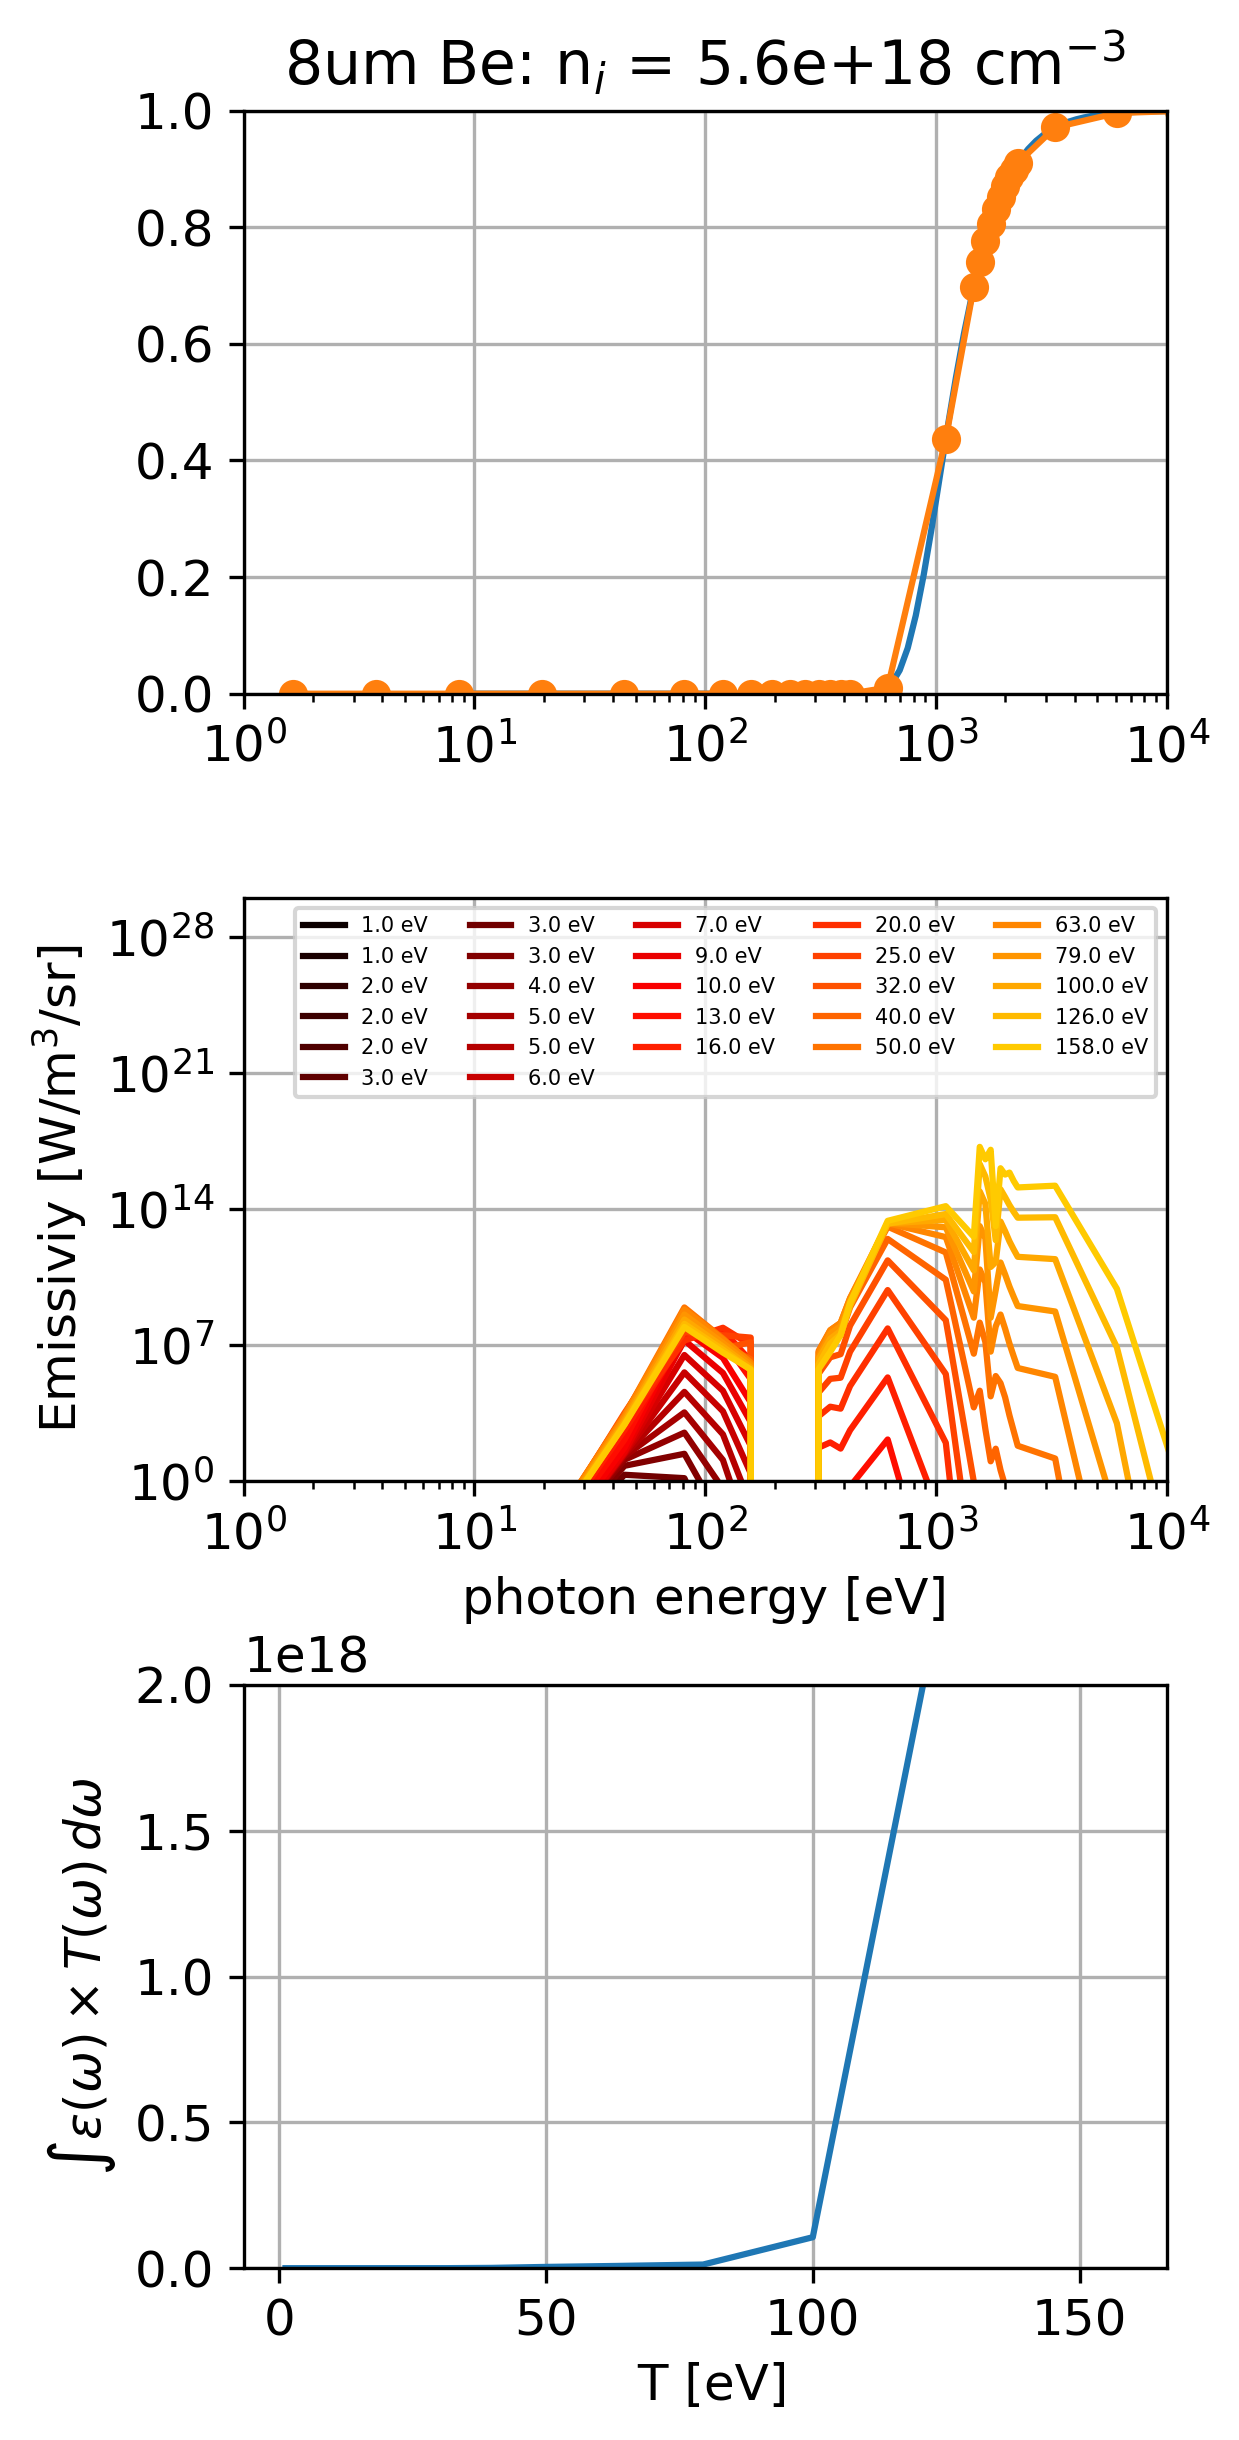

In [11]:
# filter_dir = '\\Users\\rdatta\\Dropbox (MIT)\\PUFFIN\\Codes\\MARZ\\filter_tables\\'
filter_dir = '/Users/rishabhdatta/Dropbox (MIT)/PUFFIN/Codes/MARZ/filter_tables/'
filter_name = 'Be_10um - Copy.dat' # Filter Name
data = np.loadtxt(filter_dir +filter_name)
from scipy import interpolate
obj = interpolate.interp1d(np.log(data[:,0]), data[:,1], kind='cubic',fill_value="extrapolate")
T = obj(np.log(grp_centres))

plt.rcParams.update({'font.size': 12})
fig,axs = plt.subplots(3,1,figsize=(4,8),dpi=300,sharex=False)
axs[0].plot(data[:,0],data[:,1])
axs[0].plot(grp_centres,T,marker='o')
axs[0].set_xscale('log')
axs[0].set_xlim([1,1e4])
axs[0].set_ylim([0,1])
axs[0].grid()

import matplotlib.cm as cm

clr = cm.hot(np.linspace(0,1,40)); cnt = 0

i = 11
print('n_i [cm^-3]=',rho_op[i]/(27*1.66e-27*1e6))

signal = []

for j in A:
    print(j,T_e_op[j])
    axs[1].plot(grp_centres,np.squeeze(emi_data[:,i,j]) * np.squeeze(T),label=str(np.round(T_e_op[j])) + ' eV',color=clr[cnt])
    idx = np.argwhere(grp_centres < 1e4)
    signal.append(np.trapz(np.squeeze(emi_data[idx,i,j]) * np.squeeze(T[idx]), np.squeeze(grp_centres[idx])))
    cnt+=1
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel('photon energy [eV]')
axs[1].set_ylabel('Emissiviy [W/m$^3$/sr]')
axs[1].set_xlim([1,1e4])
axs[1].set_ylim([1,1e30])
axs[0].set_title('8um Be: n$_i$ = %1.2g cm$^{-3}$'%(rho_op[i]/(27*1.66e-27*1e6)))
axs[1].set_ylim(ymin=1)
axs[1].legend(ncol=5,fontsize=5)
axs[1].grid()

# Total signal
axs[2].plot(T_e_op[A],signal)
axs[2].grid()
axs[2].set_ylim([0,2e18])
# axs[2].set_yscale('log')
# axs[2].set_ylim([0,2e16])
axs[2].set_xlabel(' T [eV]');
axs[2].set_ylabel('$\int \epsilon(\omega)\\times T(\omega) \, d\omega$')
plt.tight_layout(pad=0.2)

emi_Be = signal


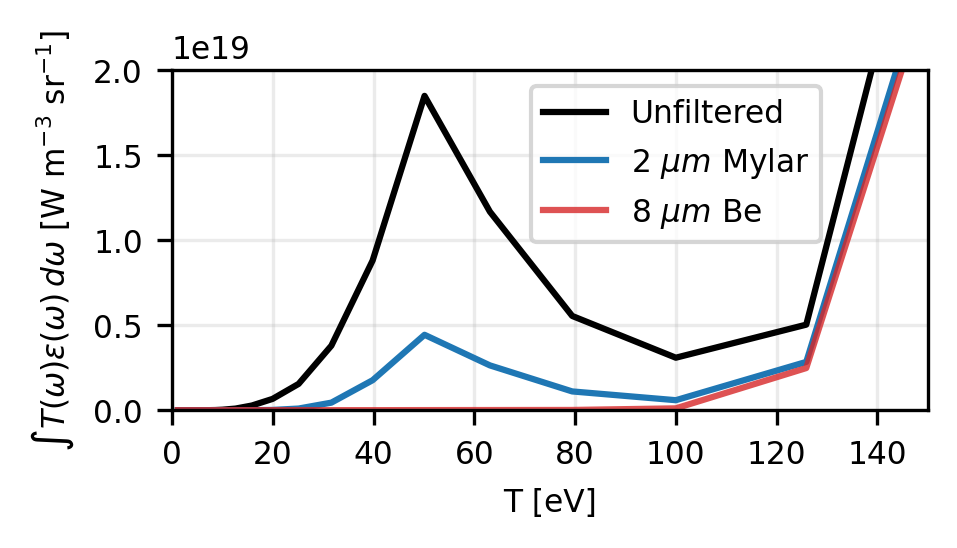

In [40]:
# Total signal (Compare between different filters)

plt.rcParams.update({'font.size': 7.5})
fig, axs = plt.subplots(1,1,figsize=(6.5/2,1.5),dpi=300)

axs.plot(T_e_op[A],emi_unfiltered,label='Unfiltered',color='k')
axs.plot(T_e_op[A],emi_mylar,label='2 $\mu m$ Mylar',color='tab:blue')
axs.plot(T_e_op[A],emi_Be,label='8 $\mu m$ Be',color='tab:red',alpha=0.8)

axs.grid(alpha=0.25)
axs.legend(bbox_to_anchor=(0,0,0.88,1))
axs.set_xlabel('T [eV]')
axs.set_xlim([0,150])
axs.set_ylim([0,2e19])
axs.set_ylabel('$\int T(\omega) \epsilon(\omega)  \, d\omega$ [W m$^{-3}$ sr$^{-1}$]')

savePath = '/Users/rishabhdatta/Dropbox (MIT)/PUFFIN/Data/MARZ/Figures_POP/'
fig.savefig(savePath + 'emissivity.png',bbox_inches='tight')

# Total Emission

- Now plot the emitted intensity [W/m^2/sr/eV] for different filtrations
- Need to include 1-D radiation transport solutions

In [13]:
# for a sphere
from scipy import interpolate
    
def sphere(rho_q,Te_q,R,T=np.ones_like(grp_centres)): # Assumes uniform emission from a sphere
    # rho_q [kg/m^3]
    # T_q [eV]
    # R [m]
    
    out = np.zeros(grp_centres.shape[0])
   
    for ii in range(grp_centres.shape[0]): 
        w = grp_centres[ii] # group center, eV
        emi_w = np.squeeze(emi_data[ii,:,:]) # W/m^3/sr
        opa_w = np.squeeze(opa_data[ii,:,:]) # per m
        
        # Interpolate for given denisty and temp.
        f_emi = interpolate.interp2d(np.log(rho_op), np.log(T_e_op), emi_w.transpose(), kind='linear')
        jw = f_emi(np.log(rho_q),np.log(Te_q)) / grp_widths[ii] # W/m^3/eV/sr

        f_opa = interpolate.interp2d(np.log(rho_op), np.log(T_e_op), opa_w.transpose(), kind='linear')
        kw = f_opa(np.log(rho_q),np.log(Te_q)) # per m
    
        tau_w = 2 * kw * R
        
        if (tau_w > 1e2):
            out[ii] =  jw / kw * (1 + 2/tau_w**2 * ((1+tau_w)*np.exp(-1*tau_w)-1) ) # W/m^2/eV/sr
        else:
            out[ii] = jw/kw * 2*tau_w/3.0 # optically-thin
    
#     print(T*out)
        
    return 3/(4 * R) * 4 * np.pi * np.trapz(T*out,x=grp_centres)

def sphere_cumulative(rho_q,Te_q,R): # Cumulative emission, enables us to which energy band the emission comes from
    # rho_q [kg/m^3]
    # T_q [eV]
    # R [m]
    
    out = np.zeros(grp_centres.shape[0])
   
    for ii in range(grp_centres.shape[0]): 
        w = grp_centres[ii] # group center, eV
        emi_w = np.squeeze(emi_data[ii,:,:]) # W/m^3/sr
        opa_w = np.squeeze(opa_data[ii,:,:]) # per m
        
        # Interpolate for given denisty and temp.
        f_emi = interpolate.interp2d(np.log(rho_op), np.log(T_e_op), emi_w.transpose(), kind='linear')
        jw = f_emi(np.log(rho_q),np.log(Te_q)) / grp_widths[ii] # W/m^3/eV/sr

        f_opa = interpolate.interp2d(np.log(rho_op), np.log(T_e_op), opa_w.transpose(), kind='linear')
        kw = f_opa(np.log(rho_q),np.log(Te_q)) # per m
    
        tau_w = 2 * kw * R
        
        if (tau_w > 1e2):
            out[ii] =  jw / kw * (1 + 2/tau_w**2 * ((1+tau_w)*np.exp(-1*tau_w)-1) ) # W/m^2/eV/sr
        else:
            out[ii] = jw/kw * 2*tau_w/3.0 # optically-thin
        
    from scipy.integrate import cumtrapz
        
    return 3/(4 * R) * 4 * np.pi * cumtrapz(out,x=grp_centres)

def local_loss(emi,opa,R): # Local loss model implemented in GORGON
    tau = 2*opa*R # optical depth
    P = 1+2/tau**2*((1+tau)*np.exp(-tau)-1)
    P[tau < 1e-2] = 2*tau[tau < 1e-2]/3.0
    return np.sum(emi/opa*P,axis=0)*(3*np.pi/R)
        
def semi_infinite_slab(rho_q,Te_q,delta,T=np.ones_like(grp_centres)): # Assumes 1-D Semi-infinite slab geometry
    # rho_q [kg/m^3]
    # T_q [eV]
    # delta, slab thickness [m]
    
    out = np.zeros(grp_centres.shape[0])
   
    for ii in range(grp_centres.shape[0]): 
        w = grp_centres[ii] # group center, eV
        emi_w = np.squeeze(emi_data[ii,:,:]) # W/m^3/eV/sr, divide by the bin width to convert W/m^3/sr
        opa_w = np.squeeze(opa_data[ii,:,:]) # per m
        
        f_emi = interpolate.interp2d(np.log(rho_op), np.log(T_e_op), emi_w.transpose(), kind='linear')
        jw = f_emi(np.log(rho_q),np.log(Te_q))/ grp_widths[ii] # W/m^3/eV/sr
        f_opa = interpolate.interp2d(np.log(rho_op), np.log(T_e_op), opa_w.transpose(), kind='linear')
        kw = f_opa(np.log(rho_q),np.log(Te_q)) # per m
    
        tau_w =  kw * delta   
        out[ii] =  jw / kw * (1 - np.exp(-1*tau_w)) # W/m^2/eV/sr
#     print(T*out)
        
    return 4 * np.pi * np.trapz(T*out,x=grp_centres) # W/m^2 # integrate over photon energy and solid angle
        

# Plot Intensity vs Temp. assuming Slab Geometry for a specified density

(0.0, 100.0)

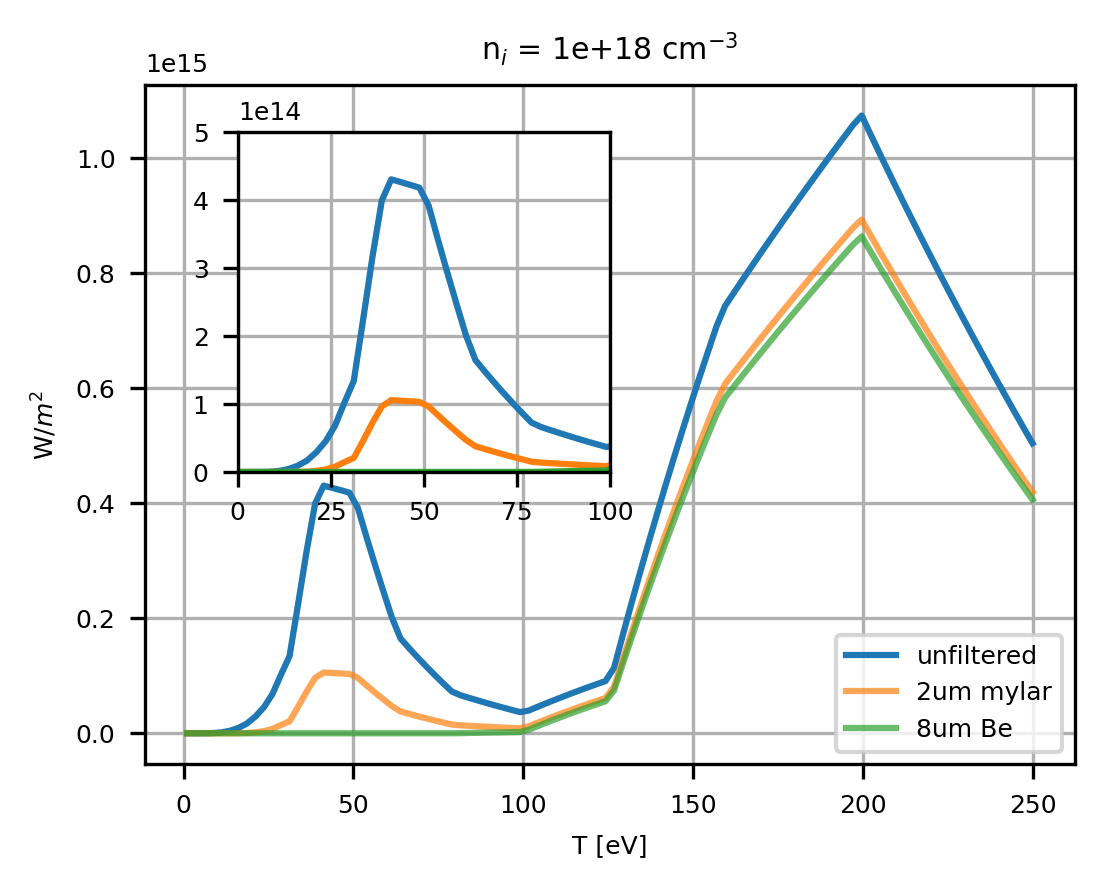

In [14]:
# Slab

# Load filters
filter_dir = '/Users/rishabhdatta/Dropbox (MIT)/PUFFIN/Codes/MARZ/filter_tables/'
filter_name = 'mylar_2um - Copy.dat'
data = np.loadtxt(filter_dir +filter_name)
from scipy import interpolate
obj = interpolate.interp1d(np.log(data[:,0]), data[:,1], kind='cubic',fill_value="extrapolate")
T_mylar = np.squeeze(obj(np.log(grp_centres)))

filter_name = 'Be_10um - Copy.dat'
data = np.loadtxt(filter_dir +filter_name)
from scipy import interpolate
obj = interpolate.interp1d(np.log(data[:,0]), data[:,1], kind='cubic',fill_value="extrapolate")
T_Be = np.squeeze(obj(np.log(grp_centres)))

# Specify plasma parameters

ni = 1e18 * 1e6 # per cubic m
rho_q = 27 * 1.6726e-27 * ni # kg / m^3
Te = np.linspace(1,250,100)
out = []
out_mylar, out_Be = [], []
delta = 1.0e-3
L = 15e-3


for ii in range(Te.shape[0]):
    Tq = Te[ii]
    out.append(semi_infinite_slab(rho_q,Tq,1*delta))
    out_mylar.append(semi_infinite_slab(rho_q,Tq,1*delta,T_mylar))
    out_Be.append(semi_infinite_slab(rho_q,Tq,1*delta,T_Be))
    
# Plot Intensity vs Temp.

plt.rcParams.update({'font.size': 6})
fig, axs = plt.subplots(1,1,figsize=(4,3),dpi=300)
axs.plot(Te,out,label='unfiltered')
axs.plot(Te,out_mylar,label='2um mylar',alpha=0.7)
axs.plot(Te,out_Be,label='8um Be',alpha=0.7)
# axs.plot(Te,5.67e-8*(Te*11604)**4,label='blackbody')
axs.set_ylabel('W/$m^2$')
axs.set_xlabel('T [eV]')
# plt.yscale("log")
# plt.xscale("log")
plt.legend(loc='lower right')
# axs.set_ylim([1e10,1e18])
axs.grid(which='both')
axs.set_title('n$_i$ = %1.2g cm$^{-3}$'%(ni/1e6))

# Create an inset axes
inset_axs = axs.inset_axes([0.1, 0.43, 0.4, 0.5])

# Plot the data on the inset axes
inset_axs.plot(Te, out)
inset_axs.plot(Te, out_mylar)
inset_axs.plot(Te, out_Be)
# inset_axs.set_yscale('log')
inset_axs.set_ylim([0,0.5e15])
inset_axs.set_xticks(np.arange(0,125,25))
inset_axs.grid()

# Set the limits of the inset axes
inset_axs.set_xlim(0, 100)
# inset_axs.set_ylim(-1, 1)


# Plot Volumetric Power Loss vs Temp. (Spherical Geometry)

1.4082702475983073e+19
1.1186526037790712e+21


(10, 10000.0)

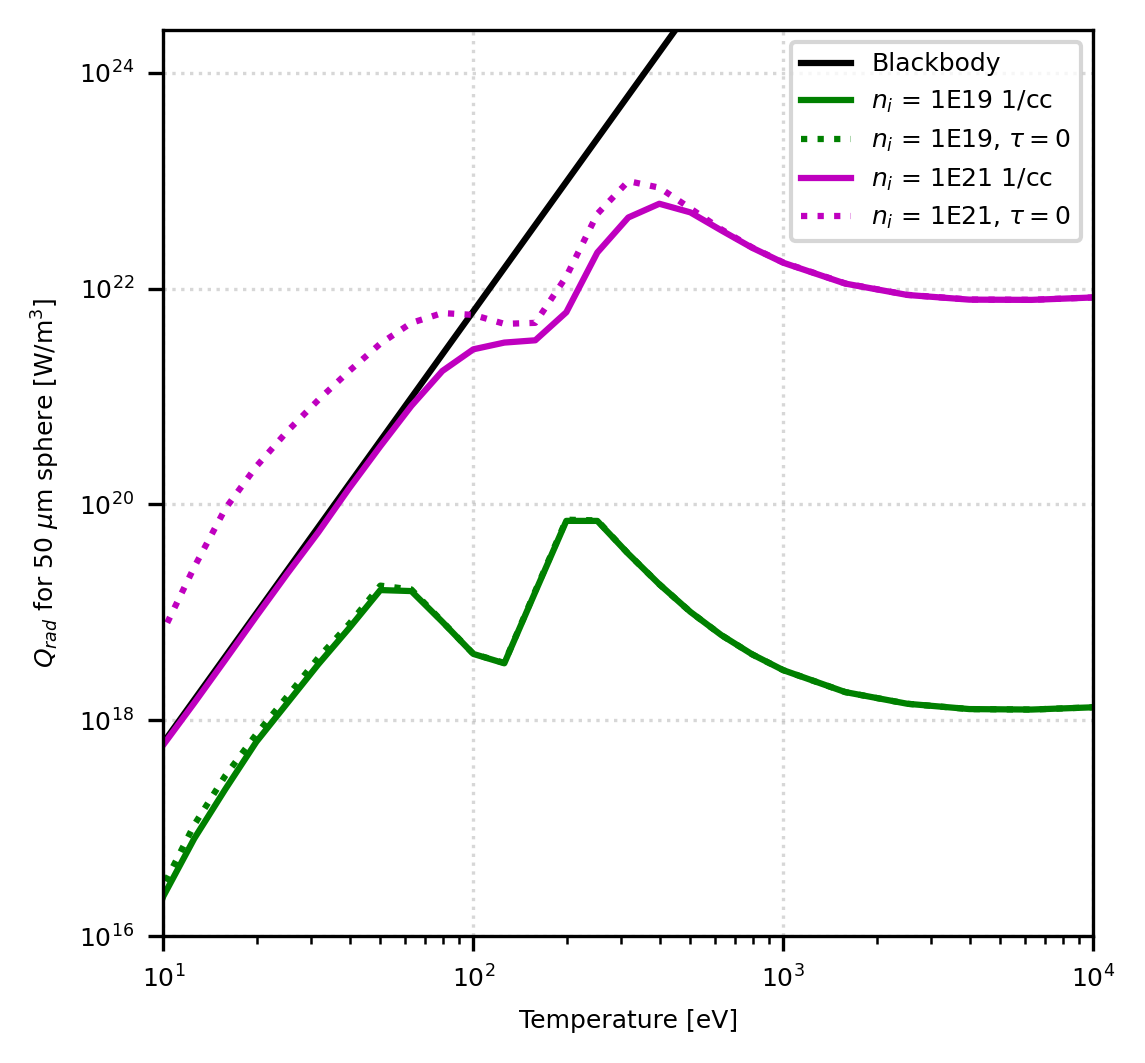

In [15]:
R = 50e-6

cs = ['g','m']
rhos = [13,26]
# rhos = [20,80]
m_Al = 26.981539*sc.atomic_mass
fig,axs = plt.subplots(1,1,figsize=(4,4),dpi=300)
axs.loglog(T_e_op,3*1.029e9*T_e_op**4/R,'k',label='Blackbody')
for i,rho_idx in enumerate(rhos):
    ni = rho_op[rho_idx]/m_Al
    print(ni/1e6)
    axs.loglog(T_e_op,local_loss(emi_data[:,rho_idx,:],opa_data[:,rho_idx,:],R),c=cs[i],label=r'$n_i$ = 1E{} 1/cc'.format(19+2*i))
    axs.loglog(T_e_op,4*np.pi*np.sum(emi_data[:,rho_idx,:],axis=0),ls=':',c=cs[i],label=r'$n_i$ = 1E{}, $\tau = 0$'.format(19+2*i))

axs.grid(alpha=0.5,linestyle=':')

axs.set_ylim(1e16,2.5e24)
axs.legend()

axs.set_ylabel(r"$Q_{rad}$ for 50 $\mu$m sphere [W/m$^3$]")
axs.set_xlabel("Temperature [eV]")
axs.set_xlim([10,1e4])

In [16]:
print(grp_widths)
for ii in range(grp_centres.shape[0]): 
        w = grp_centres[ii] # group center, eV
        if (ii == 0):
            bin_width = w * 2
        else:
            bin_width = 2 * (w - (grp_centres[ii-1] + bin_width/2))
            
        print(bin_width)

[1.2844543e+00 2.9342766e+00 6.7032213e+00 1.5313203e+01 3.4982307e+01
 3.8130543e+01 3.8130554e+01 3.8130539e+01 3.8130539e+01 3.8130554e+01
 3.8130539e+01 3.8130554e+01 3.8130554e+01 3.8130524e+01 3.8130554e+01
 3.4840451e+02 6.2208990e+02 8.9051758e+01 8.9051880e+01 8.9051758e+01
 8.9051758e+01 8.9051880e+01 8.9051758e+01 8.9051758e+01 8.9051758e+01
 8.9051758e+01 8.9052002e+01 1.9598918e+03 3.6266812e+03 6.7109922e+03
 1.2418356e+04 2.2979543e+04]
3.284454345703125
0.9342765808105469
8.70322036743164
13.31320571899414
36.98230743408203
36.13054656982422
40.13054656982422
36.130531311035156
40.130577087402344
36.13050079345703
40.130577087402344
36.130531311035156
40.130577087402344
36.130470275878906
40.130638122558594
346.4043960571289
624.0901107788086
87.0514907836914
91.0520248413086
87.0517349243164
91.0517807006836
87.0519790649414
91.0515365600586
87.0519790649414
91.0515365600586
87.0519790649414
91.0515365600586
1957.8927993774414
3628.6794662475586
6708.994361877441
12420

# Compare Sphere Solution to Aidan's Local Loss Model

ni [per cc] =  1.408359613525152e+18


/var/folders/yx/1xzcdppn0xxd5w6bf_xnbgrw0000gn/T/ipykernel_47688/3469137644.py:66: RuntimeWarning: divide by zero encountered in true_divide
  P = 1+2/tau**2*((1+tau)*np.exp(-tau)-1)
/var/folders/yx/1xzcdppn0xxd5w6bf_xnbgrw0000gn/T/ipykernel_47688/3469137644.py:66: RuntimeWarning: invalid value encountered in multiply
  P = 1+2/tau**2*((1+tau)*np.exp(-tau)-1)


(10, 10000.0)

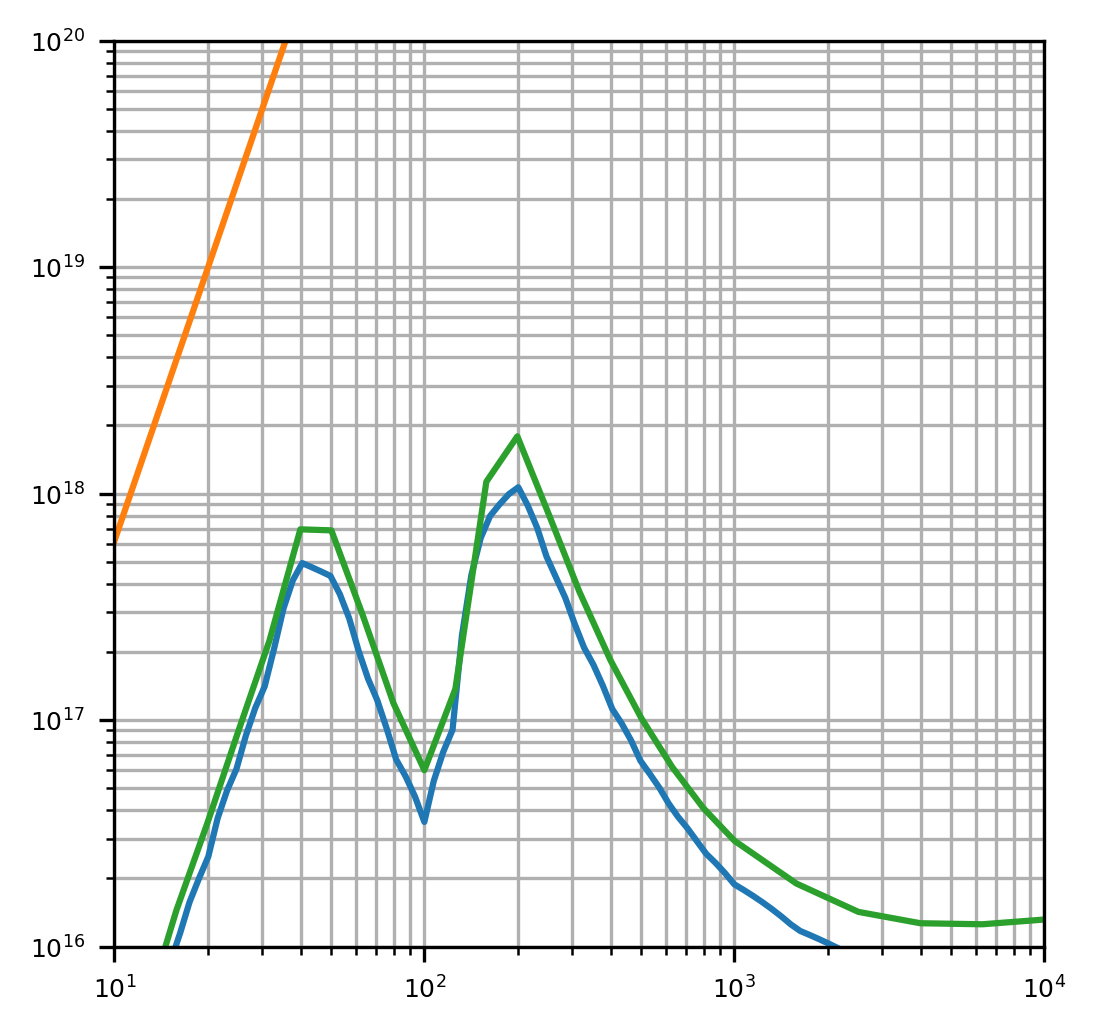

In [19]:
# Sphere

ni = 1e18 * 1e6 # per cubic m
rho_q = 27 * 1.6726e-27 * ni # kg / m^3
Te = np.logspace(1,4,100)
out = []
R = 50e-6
Vol = 4/3 * np.pi * R**3
A = 4 * np.pi * R**2


for ii in range(Te.shape[0]):
    Tq = Te[ii]
    out.append(sphere(rho_q,Tq,R))
    
    
# adian's local loss model
rho_idx = 8
ni = rho_op[rho_idx]/m_Al
print('ni [per cc] = ',ni/1e6)
P_local = local_loss(emi_data[:,rho_idx,:],opa_data[:,rho_idx,:],R)

# print(sphere(rho_q,50,R))
fig, axs = plt.subplots(1,1,figsize=(4,4),dpi=300)
axs.plot(Te,out)
axs.plot(Te,5.67e-8*(Te*11604)**4*A/Vol,label='blackbody')
axs.plot(T_e_op,P_local)
plt.yscale("log")
plt.xscale("log")
axs.grid(which='both')
axs.set_ylim([1e16,1e20])
axs.set_xlim([10,1e4])

# Predict Volumetric Power Loss Given Plasma Parameters 

In [21]:
# For isotropicilly emitting layer

ni = 5e18 * 1e6 # per cubic m
rho_q = 27 * 1.6726e-27 * ni # kg / m^3
Te_q = 170 # eV
delta = 1.2e-3 # m
L = 15e-3 # m
A = 2 * (2 * L)**2 + 4 * (2 * L * 2 * delta) # m^2
Vol = (2 * L)**2 * (2 * delta) # m^3

# (a) sphere model
Prad = sphere(rho_q,Te_q,R=1*Vol/A)
print('Prad_sph [x1e17 W/m^3] = ', Prad/1e17)

# (b) slab model
Prad = semi_infinite_slab(rho_q,Te_q,2*delta) * (2 * L)**2 / Vol # W/m^3
print('Prad_slab [x1e17 W/m^3] = ', Prad/1e17)

Prad_sph [x1e17 W/m^3] =  87.64354762325299
Prad_slab [x1e17 W/m^3] =  69.5642162092872


In [22]:
print((1/delta + 2/L)**(-1)*1e3)
print(Vol/A*1e3)

1.0344827586206895
1.0344827586206895


In [23]:
# For isotropicilly emitting layer

ni = 1e18 * 1e6 # per cubic m
rho_q = 27 * 1.6726e-27 * ni # kg / m^3
Te_q = 170
R = 1e-3

# (a) sphere model
Prad = sphere(rho_q,Te_q,R=R)
print('Prad_sph [W/m^3] = ', Prad/1e15)


# (b) slab model
Prad = semi_infinite_slab(rho_q,Te_q,2*delta) * (2 * L)**2 / Vol # W/m^3
print('Prad_slab [W/m^3] = ', Prad/1e15)

Prad_sph [W/m^3] =  857.0813771509592
Prad_slab [W/m^3] =  806.5260800920294


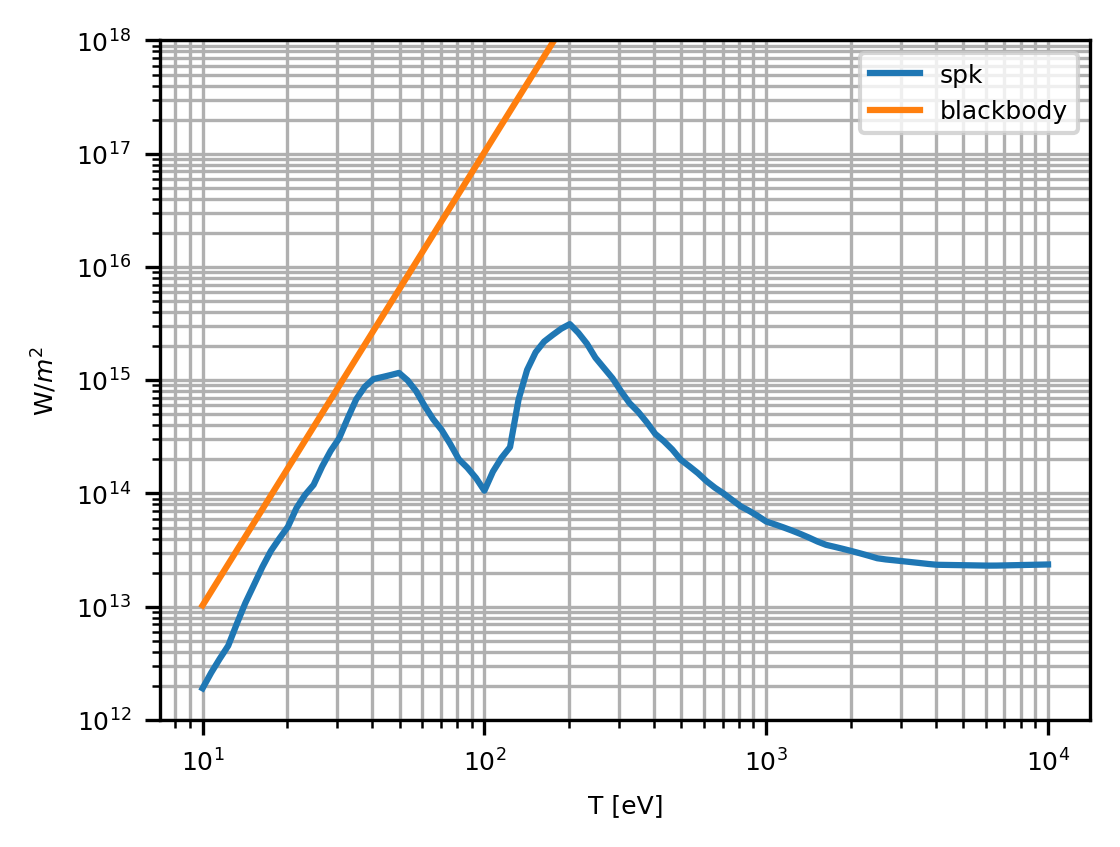

In [24]:
# Slab

ni = 1e18 * 1e6 # per cubic m
rho_q = 27 * 1.6726e-27 * ni # kg / m^3
Te = np.logspace(1,4,100)
out = []
delta = 1.5e-3
L = 15e-3
for ii in range(Te.shape[0]):
    Tq = Te[ii]
    out.append(semi_infinite_slab(rho_q,Tq,2*delta))
    
fig, axs = plt.subplots(1,1,figsize=(4,3),dpi=300)
axs.plot(Te,out,label='spk')
axs.plot(Te,5.67e-8*(Te*11604)**4,label='blackbody')
axs.set_ylabel('W/$m^2$')
axs.set_xlabel('T [eV]')
plt.yscale("log")
plt.xscale("log")
plt.legend()
axs.set_ylim([1e12,1e18])
axs.grid(which='both')

# Caluclated value for layer parameters (unfiltered and filtered)

In [27]:
filter_name = 'Be_10um - Copy.dat'
data = np.loadtxt(filter_dir +filter_name)
from scipy import interpolate
obj = interpolate.interp1d(np.log(data[:,0]), data[:,1], kind='linear',fill_value="extrapolate")
T_Be = np.squeeze(obj(np.log(grp_centres)))


ni = 5e18 * 1e6 # per cubic m
rho_q = 27 * 1.6726e-27 * ni # kg / m^3
Te_q = 60 # eV
delta = 1.5e-3 / 2 # m
L = 15e-3 # m

Iout = semi_infinite_slab(rho_q,Te_q,2*delta) # W/m^2
Iout_Be = semi_infinite_slab(rho_q,Te_q,2*delta,T=T_Be) # W/m^2

A = 2 * (2 * L)**2
vol = (2 * L)**2 * (2 * delta)
Prad = Iout * A / vol
Prad_Be = Iout_Be * A / vol
print('Iout [W/m^2] = %1.3g'%Iout)
print('Prad_slab (unfiltered) [W/m^3] = %1.3g '%Prad)
print('Prad_slab (filtered) [W/m^3] = %1.3g'%Prad_Be)

# (b) sphere model
Prad = sphere(rho_q,Te_q,R=vol/A)
print('Prad_sph (unfiltered) [W/m^3] = %1.3g'%Prad)


# (b) sphere model - filtered
Prad_Be = sphere(rho_q,Te_q,R=vol/A,T=np.abs(T_Be))
print('Prad_sph (filtered) [W/m^3] = %1.3g ' %Prad_Be)

Iout [W/m^2] = 4.4e+15
Prad_slab (unfiltered) [W/m^3] = 5.86e+18 
Prad_slab (filtered) [W/m^3] = 4.34e+14
Prad_sph (unfiltered) [W/m^3] = 3.67e+18
Prad_sph (filtered) [W/m^3] = 2.19e+14 


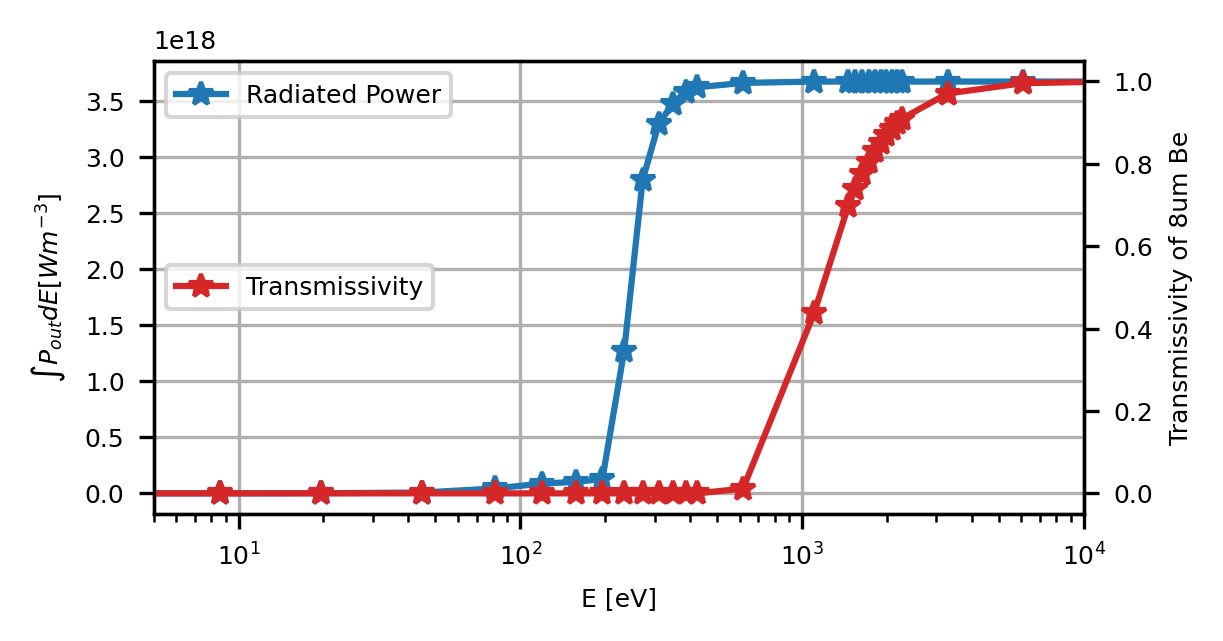

In [28]:
# Cumulative integral

# (b) sphere model
Prad = sphere_cumulative(rho_q,Te_q,R=vol/A)

fig, axs = plt.subplots(1,1,figsize=(4,2),dpi=300)
axs.plot(grp_centres[1:],Prad,'*-',label='Radiated Power')
axs.set_xlim([5,10e3])
axs.set_xscale('log')
axs.set_ylabel('$\int P_{out} dE [Wm^{-3}]$')
axs.set_xlabel('E [eV]')
axs.grid()


ax2 = axs.twinx()
ax2.plot(grp_centres,T_Be,'-*',color='tab:red',label='Transmissivity')
ax2.set_ylabel('Transmissivity of 8um Be')
axs.legend()
ax2.legend(loc='center left')


In [29]:
# For plasmoid

ni = 5e18 * 1e6 # per cubic m
rho_q = 27 * 1.6726e-27 * ni # kg / m^3
Te_q = 170 # eV
d = 0.4e-3 # m
L = 15e-3 # m
vol = np.pi * (d/2)**2 * (2 * L)
A = 2 * np.pi * (d/2) * L

# (b) sphere model
Prad = sphere(rho_q,Te_q,R=vol/A)
print('Prad_sph (unfiltered) [W/m^3] = %1.3g '%Prad)
Prad_Be = sphere(rho_q,Te_q,R=vol/A,T=T_Be)
print('Prad_sph (filtered) [W/m^3] =  %1.3g'%Prad_Be)

Prad_sph (unfiltered) [W/m^3] = 8.76e+18 
Prad_sph (filtered) [W/m^3] =  6.81e+18


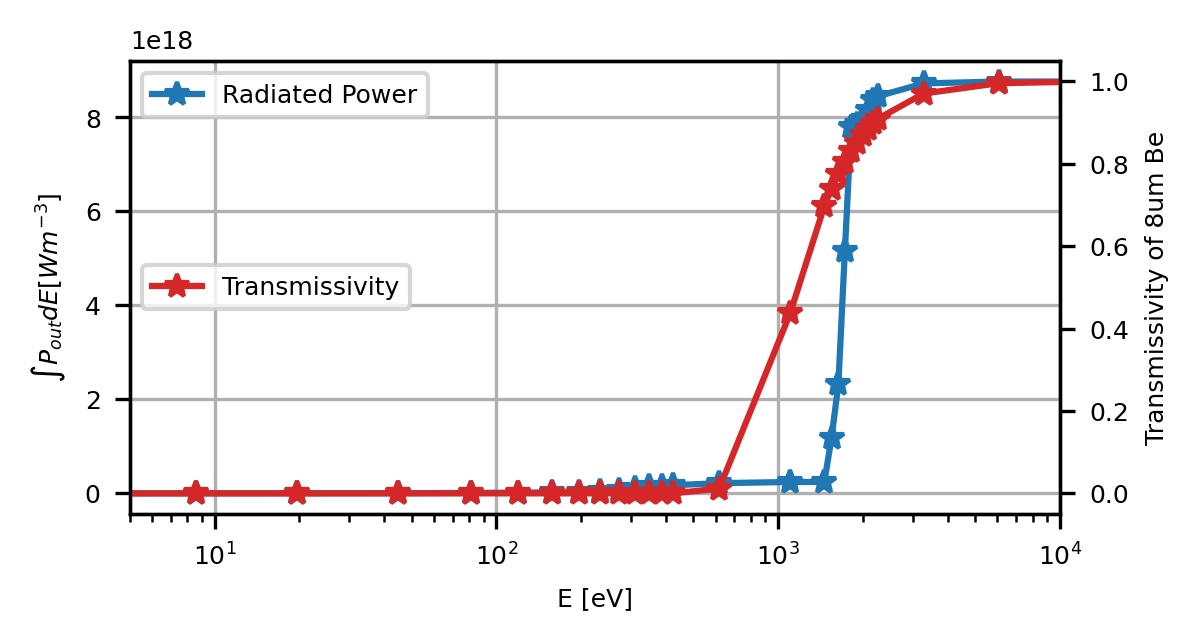

In [30]:
# Cumulative integral

# (b) sphere model
Prad = sphere_cumulative(rho_q,Te_q,R=vol/A)

fig, axs = plt.subplots(1,1,figsize=(4,2),dpi=300)
axs.plot(grp_centres[1:],Prad,'*-',label='Radiated Power')
axs.set_xlim([5,10e3])
axs.set_xscale('log')
axs.set_ylabel('$\int P_{out} dE [Wm^{-3}]$')
axs.set_xlabel('E [eV]')
axs.grid()


ax2 = axs.twinx()
ax2.plot(grp_centres,T_Be,'-*',color='tab:red',label='Transmissivity')
ax2.set_ylabel('Transmissivity of 8um Be')
axs.legend()
ax2.legend(loc='center left')


# Variable Layer

Prad_sph (unfiltered) [W/m^3] = 5.94e+17


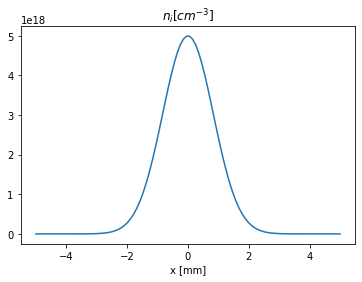

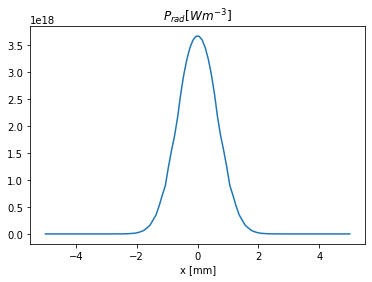

In [131]:
x = np.linspace(-5e-3,5e-3,100)
dx = np.diff(x)[0]
n0 = 5e18 * 1e6

fwhm = 1.5e-3
delta = fwhm /2
sig = fwhm / 2.55
L = 15e-3
A = 2 * (2 * L)**2
vol = (2 * L)**2 * (2 * delta)

ni =  n0 * np.exp(-x**2/(2*sig)**2)
# ni[np.where(np.abs(x)<=delta)] = n0

fig, axs = plt.subplots(1,1)
plt.plot(x*1e3,ni/1e6)
plt.title('$n_i [cm^{-3}]$')
plt.xlabel('x [mm]')

Prad = np.zeros_like(ni)

for ii in range(Prad.shape[0]):
    Prad[ii] = sphere(27 * 1.6726e-27 * ni[ii],Te_q=60,R=dx) # W/m^-3


fig, axs = plt.subplots(1,1)
plt.plot(x*1e3,Prad)
plt.title('$P_{rad} [W m^{-3}]$')
plt.xlabel('x [mm]')


Pout = np.trapz(Prad,x=x) / 10e-3 # W/m^-3

print('Prad_sph (unfiltered) [W/m^3] = %1.3g' %(Pout))

Prad_sph (unfiltered) [W/m^3] = 3.6e+17


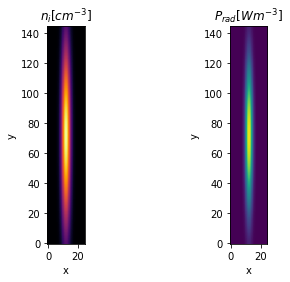

In [144]:
x = np.linspace(-5e-3,5e-3,25)
dx = np.diff(x)[0]
y = np.arange(-30e-3,30e-3+dx,dx)

xx, yy = np.meshgrid(x,y)

n0 = 5e18 * 1e6

fwhm = 1.5e-3
delta = fwhm /2
sig = fwhm / 2.355
L = 15e-3
sig_y = (2 * L) / 2.355
A = 2 * (2 * L)**2
vol = (2 * L)**2 * (2 * delta)

ni =  n0 * np.exp(-xx**2/(2*sig)**2) * np.exp(-yy**2/(2*sig_y)**2)


fig, axs = plt.subplots(1,2)
axs[0].imshow(ni/1e6, origin='lower',cmap='inferno')
axs[0].set_title('$n_i [cm^{-3}]$')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

Prad = np.zeros_like(ni)

for ii in range(Prad.shape[0]):
    for jj in range(Prad.shape[1]):
        Prad[ii,jj] = sphere(27 * 1.6726e-27 * ni[ii,jj],Te_q=60,R=dx) # W/m^-3


axs[1].imshow(Prad, origin='lower',cmap='viridis')
axs[1].set_title('$P_{rad} [W m^{-3}]$')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')


Pout = np.sum(Prad*dx**2) / (10e-3 * 60e-3) # W/m^-3

# fig, axs = plt.subplots(1,1)
# plt.plot(x*1e3,Prad)

# plt.xlabel('x [mm]')


# Pout = np.trapz(Prad,x=x) / 10e-3 # W/m^-3

print('Prad_sph (unfiltered) [W/m^3] = %1.3g' %(Pout))

rad_spk =  (107,)


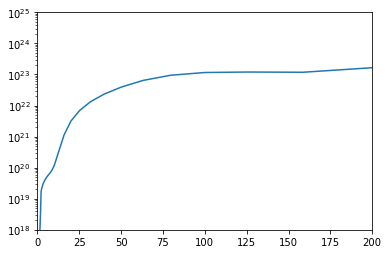

In [20]:
rad_spk = 4*np.pi*emi_data[:, 50, :].sum(axis = 0) #W/eV/m^3/sr -> W/m^3

print('rad_spk = ', rad_spk.shape)

plt.semilogy(T_e_op,rad_spk)
plt.xlim([0,200])
plt.ylim([1e18,1e25])
plt.show()

In [51]:
# get total emissivity
emi_tot = 4 * np.pi * emi_data.sum(axis = 0)# W/m^3
opa_tot = opa_data.sum(axis = 0) # W/m^3

print('emi_tot = ', emi_tot.shape)
print('opa_tot = ', emi_tot.shape)

# save as csv

np.savetxt('./atomic_rad_data/total_emissivity.csv',emi_tot,delimiter=',')
np.savetxt('./atomic_rad_data/total_opacity.csv',opa_tot,delimiter=',')
np.savetxt('./atomic_rad_data/rho.csv',rho_op,delimiter=',')
np.savetxt('./atomic_rad_data/Te.csv',T_e_op,delimiter=',')

emi_tot =  (132, 107)
opa_tot =  (132, 107)


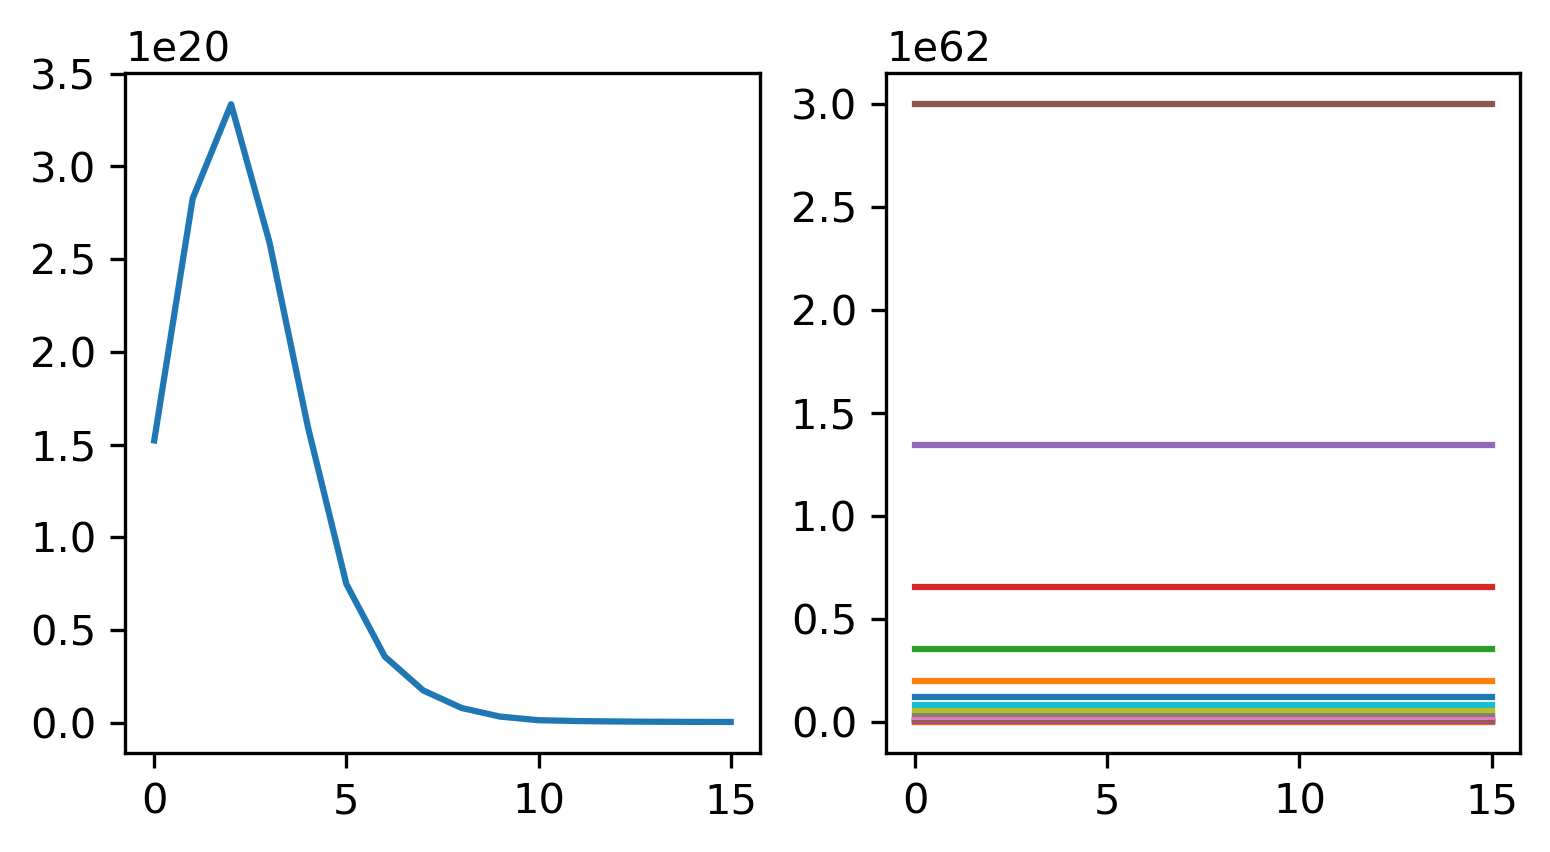

In [22]:

# Basen on Simulation

ni = np.load('layer_ni.npy')
Te = np.load('layer_Te.npy')

ni = ni * 1e6 # per cubic m
rho_q = 27 * 1.6726e-27 * ni # kg / m^3
Te_q = Te
delta = 1.0e-3
L = 15e-3
A = 2 * (2 * L)**2 + 4 * (2 * L * 2 * delta)
vol = (2 * L)**2 * (2 * delta)

# Unfiltered emission based on sphere model
Prad1, Prad2 = [], []
for ii in range(ni.shape[0]):
    # (b) sphere model
    Prad1.append(sphere(rho_q[ii],Te_q[ii],R=vol/A))
#     Prad2.append(sphere(rho_q[ii],Te_q[ii],R=vol/A,T=T_vis))
    Prad2.append(ni**2*Te**0.5)

fig, axs = plt.subplots(1,2,figsize=(6,3),dpi=300)
axs[0].plot(Prad1)
axs[1].plot(Prad2)

In [24]:
Te.shape

(16,)